<a href="https://colab.research.google.com/github/grwgabriel/Analise-Descritiva-Felicidade-Mundial/blob/main/Projeto_An%C3%A1lise_Felicidade_Mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo da análise

O objetivo dessa análise é identificar quais variáveis influenciam e como influenciam na felicidade da população ao longo dos anos e pelas regiões do mundo. Além de tentar trazer uma reflexão para que se possa elaborar políticas públicas e ações efetivas que contribuam para o desenvolvimento econômico e social e para a melhoria da qualidade de vida das pessoas em todo o mundo.

#Entendendo as variáveis do dataset


- País: País em que a pesquisa foi realizada;
- Indicador Regional: Indica qual a região do país;
- Ano: Ano em que a pesquisa foi realizada, de 2005 até 2022;
- Escada da Vida: Indicador da felicidade, medido da seguinte forma: “Em uma escada com 10 degraus, em qual degrau você considera que sua vida está?” (entre 1 e 10);
- PIB per Capita: Índice de medição para o Desenvolvimento econômico/poder aquisitivo;
- Apoio Social: Indicador que informa se você, em um momento de necessidade, pode contar com ajuda de amigos e/ou familiares (opções 1 ou 0 [sim ou não]);
- Expectativa de vida: Baseado nas informações da Organização Mundial da Saúde (OMS);
- Liberdade de Escolha: Indicador que mede se você se sente livre ao realizar suas escolhas (Opções 1 ou 0);
- Generosidade: Indicador que mede se, no último ano, realizou algum tipo de doação a entidades carentes (opções 1 ou 0);
- Noções de Corrupção: Indicador que faz uma média ente percepção de corrupção no governo e corrupção nos negócios (opções 1 ou 0).

#Importando bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib as mpl

#Tratamento de dados

In [2]:
# Importando e visualizando nossa database

db = pd.read_csv("World Happiness Report.csv", sep = ',')
db

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,Sub-Saharan Africa,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726,0.550508
2195,Zimbabwe,Sub-Saharan Africa,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354,0.456455
2196,Zimbabwe,Sub-Saharan Africa,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736,0.577302
2197,Zimbabwe,Sub-Saharan Africa,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682,0.665703


In [3]:
# Algumas colunas não serão necessárias para a análise, portanto serão excluídas.
db.drop(columns = ["Confidence In National Government", "Positive Affect", "Negative Affect"], inplace = True)

In [4]:
#Traduzindo os valores da coluna de regiões

regioes = {
    'South Asia': 'Ásia do Sul',
    'Central and Eastern Europe': 'Europa Central e Oriental',
    'Middle East and North Africa': 'Oriente Médio e Norte da África',
    'Latin America and Caribbean': 'América Latina e Caribe',
    'Commonwealth of Independent States': 'Comunidade dos Estados Independentes',
    'North America and ANZ': 'América do Norte e ANZ',
    'Western Europe': 'Europa Ocidental',
    'Sub-Saharan Africa': 'África Subsaariana',
    'Southeast Asia': 'Sudeste Asiático',
    'East Asia': 'Ásia Oriental'
}

db["Regional Indicator"] = db["Regional Indicator"].replace(regioes)

In [5]:
# Verificando o tipo de dados que temos em cada coluna
db.dtypes

Country Name                         object
Regional Indicator                   object
Year                                  int64
Life Ladder                         float64
Log GDP Per Capita                  float64
Social Support                      float64
Healthy Life Expectancy At Birth    float64
Freedom To Make Life Choices        float64
Generosity                          float64
Perceptions Of Corruption           float64
dtype: object

In [6]:
#Algumas estatísticas das colunas
db.describe()

,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276


##Tratando os valores nulos

In [7]:
#Verificando a quantidade de valores nulos
db.isna().sum()

Country Name                          0
Regional Indicator                  112
Year                                  0
Life Ladder                           0
Log GDP Per Capita                   20
Social Support                       13
Healthy Life Expectancy At Birth     54
Freedom To Make Life Choices         33
Generosity                           73
Perceptions Of Corruption           116
dtype: int64

In [8]:
# Verificando a quantidade de valores nulos por país na coluna Perceptions Of Corruption
contagem_vazios = db["Perceptions Of Corruption"].isnull().groupby(db["Country Name"]).sum()
contagem_vazios[contagem_vazios >0].sort_values(ascending = False)

Country Name
China                   16
Saudi Arabia            14
United Arab Emirates    12
Jordan                  11
Turkmenistan            10
Egypt                    7
Kuwait                   7
Bahrain                  6
Malta                    5
Vietnam                  4
Qatar                    4
Yemen                    3
Uzbekistan               2
Algeria                  2
Libya                    2
Madagascar               1
Oman                     1
Laos                     1
Singapore                1
South Africa             1
Sweden                   1
Ethiopia                 1
Cuba                     1
Congo (Brazzaville)      1
Cambodia                 1
Maldives                 1
Name: Perceptions Of Corruption, dtype: int64

In [9]:
db[db["Country Name"] == "China"]

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
381,China,Ásia Oriental,2006,4.560495,8.696139,0.747011,65.660004,NaN,NaN,NaN
382,China,Ásia Oriental,2007,4.862862,8.823968,0.810852,65.919998,NaN,-0.178883,NaN
383,China,Ásia Oriental,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.095184,NaN
384,China,Ásia Oriental,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.163264,NaN
385,China,Ásia Oriental,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.136182,NaN
386,China,Ásia Oriental,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.189271,NaN
387,China,Ásia Oriental,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.187489,NaN
388,China,Ásia Oriental,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.160523,NaN
389,China,Ásia Oriental,2014,5.195619,9.380201,0.820366,67.739998,NaN,-0.219485,NaN
390,China,Ásia Oriental,2015,5.303878,9.442431,0.793734,68.000000,NaN,-0.247149,NaN


  Separando uma amostra na coluna que mais temos valores faltantes (Perceptions Of Corruption), encontramos a China como sendo o país com mais valores faltantes nessa coluna.<br>
Teremos que tratar esses valores nulos pois eles podem distorcer muito nossa análise, então iremos seguir da seguinte forma:<br>
  - Para os países que possuem apenas alguns valores nulos, iremos calcular a média da coluna para aquele país e preencher esse resultado no campo nulo;
  -Para os países que possuem alguma coluna com todos os valores nulos, será preenchido com a média de toda a database.

In [10]:
# Média por país
media_pais = db.groupby("Country Name").transform('mean')

# Média total
media_geral = db.mean()

# Substituir valores nulos pela média do país caso o país tenha algum valor na coluna
db.fillna(media_pais, inplace = True)

#Substituir valores nulos pela média do país caso o país não tenha valores na coluna
db.fillna(media_geral, inplace = True)

#Substituindo valores nulos na coluna Regional Indicator para "Desconhecido"
db["Regional Indicator"].fillna("Unknown", inplace = True)
db.isna().sum()

<ipython-input-10-2fdcadf0da58>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_pais = db.groupby("Country Name").transform('mean')
<ipython-input-10-2fdcadf0da58>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_geral = db.mean()


Country Name                        0
Regional Indicator                  0
Year                                0
Life Ladder                         0
Log GDP Per Capita                  0
Social Support                      0
Healthy Life Expectancy At Birth    0
Freedom To Make Life Choices        0
Generosity                          0
Perceptions Of Corruption           0
dtype: int64

In [11]:
#Verificando se o tratamento deu certo
db[db["Country Name"] == "China"]

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption
381,China,Ásia Oriental,2006,4.560495,8.696139,0.747011,65.660004,0.848398,-0.160441,0.745195
382,China,Ásia Oriental,2007,4.862862,8.823968,0.810852,65.919998,0.848398,-0.178883,0.745195
383,China,Ásia Oriental,2008,4.846295,8.910974,0.748287,66.180000,0.853072,-0.095184,0.745195
384,China,Ásia Oriental,2009,4.454361,8.995829,0.798034,66.440002,0.771143,-0.163264,0.745195
385,China,Ásia Oriental,2010,4.652737,9.092073,0.767753,66.699997,0.804794,-0.136182,0.745195
386,China,Ásia Oriental,2011,5.037208,9.177827,0.787171,66.959999,0.824162,-0.189271,0.745195
387,China,Ásia Oriental,2012,5.094917,9.246742,0.787818,67.220001,0.808255,-0.187489,0.745195
388,China,Ásia Oriental,2013,5.241090,9.314875,0.777896,67.480003,0.804724,-0.160523,0.745195
389,China,Ásia Oriental,2014,5.195619,9.380201,0.820366,67.739998,0.848398,-0.219485,0.745195
390,China,Ásia Oriental,2015,5.303878,9.442431,0.793734,68.000000,0.848398,-0.247149,0.745195


# Análise Descritiva

## Felicidade durante os anos

Text(0.5, 1.0, 'Média de felicidade por ano')

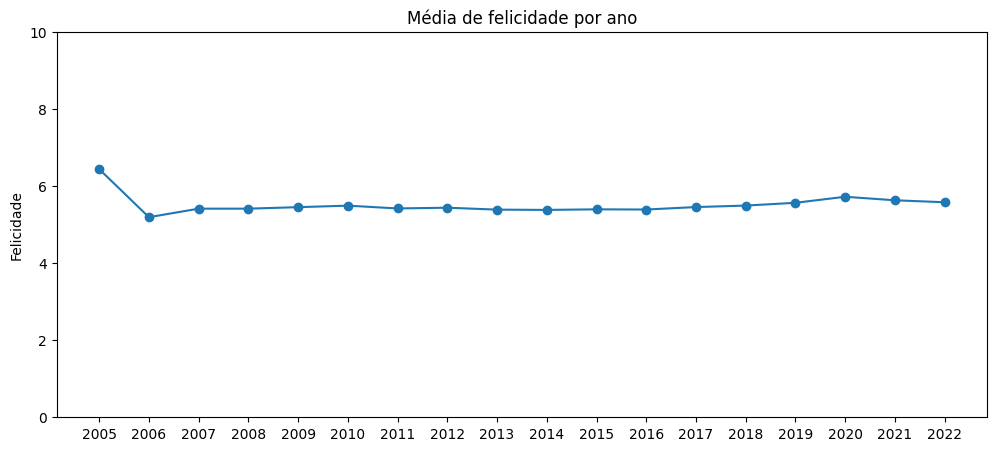

In [12]:
#Agrupando os anos para as médias
felicidade_ano = db.groupby("Year")["Life Ladder"].mean()

#Configurando o gráfico
plt.figure(figsize=(12, 5))
plt.plot(felicidade_ano.index, felicidade_ano.values, marker = "o")
plt.ylim(0, 10)
plt.ylabel("Felicidade")
plt.xticks(felicidade_ano.index)
plt.title("Média de felicidade por ano")

Analisando a média de felicidade por ano não conseguimos chegar a muitas conclusões, pois a média geral durante os anos praticamente não altera. Fiquei surpreso por aparentemente a pandemia do covid não ter alterado significativamente o gráfico.

## Média da felicidade nos países mais felizes e menos felizes

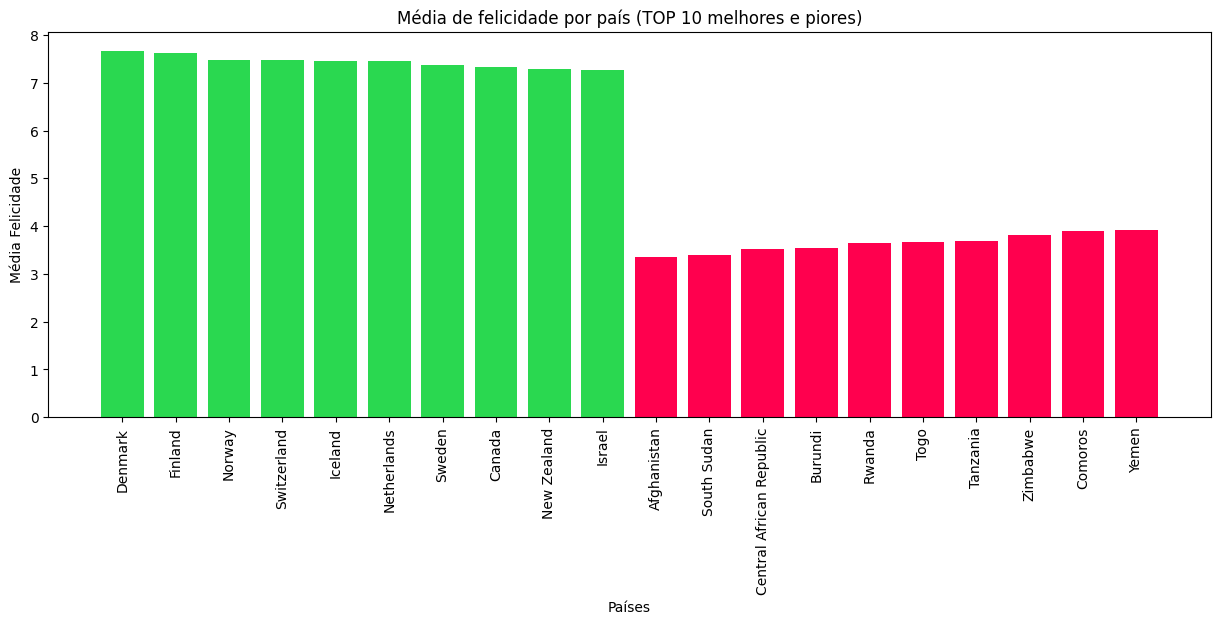

In [13]:
# Criando as médias dos melhores países
x = db.groupby("Country Name")["Life Ladder"].mean().sort_values(ascending = False).head(10)

# Criando as médias dos piores países
y = db.groupby("Country Name")["Life Ladder"].mean().sort_values(ascending = True).head(10)

# Configurando o gráfico
plt.figure(figsize=(15, 5))
plt.bar(x.index, x.values, color = '#2AD850')
plt.bar(y.index, y.values, color = '#FF004E')
plt.xlabel('Países')
plt.ylabel('Média Felicidade')
plt.title("Média de felicidade por país (TOP 10 melhores e piores)")
plt.xticks(rotation = 90);

Conseguimos ver que aparentemente tem uma média maior os países mais desenvolvidos, e países menos desenvolvidos possuem uma média menor.

## Ranking de felicidade por região

Text(0, 0.5, '')

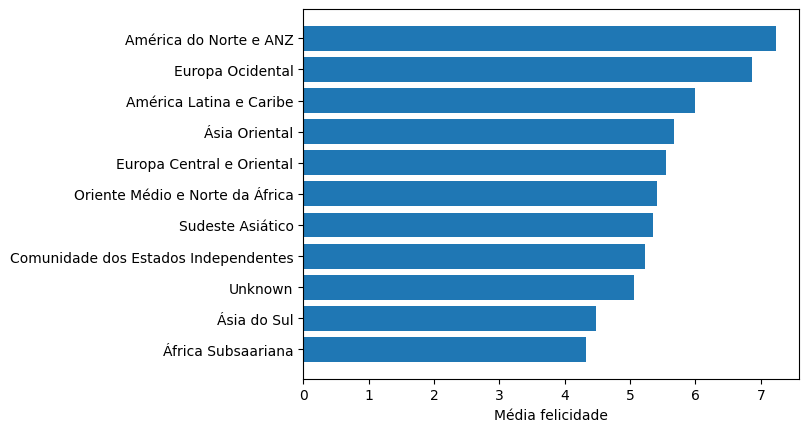

In [14]:
#Criando a tabela de felicidade por região
felicidade_regioes = db.groupby("Regional Indicator")["Life Ladder"].mean().sort_values().reset_index()

#Plotando o gráfico
plt.barh(felicidade_regioes["Regional Indicator"],felicidade_regioes["Life Ladder"])
plt.xlabel("Média felicidade")
plt.ylabel("")

## Análise global da felicidade

In [15]:
# Média de felicidade por país e ano
media_pais2 = db.groupby(["Country Name", "Year"])["Life Ladder"].mean().reset_index()

# Plotando o gráfico

mapa = px.choropleth(media_pais2, locations = "Country Name",locationmode="country names", color="Life Ladder",animation_frame="Year",
                     color_continuous_scale=px.colors.sequential.Hot, projection="natural earth", width=1000, height=600,title = "Mapa da felicidade por país e ano")

# Configurando o título
mapa.update_layout(title_font_size=20, title_x=0.5
)
mapa.show()


Já o mapa, conforme os anos se passaram, nos mostra que:

- Países da América do Sul tiveram queda na felicidade, mas no último ano de pesquisa melhoraram significativamente;
- Países da América Central e e América do Norte demonstraram equílibrio em boas médias;
- Continente Africano sempre com médias baixas e vários países nem entram nas pesquisas;
- Ásia também em sua maioria com médias baixas;
- Europa demonstrou muita melhora na média conforme os anos se passaram, mas também com países que sempre tiveram boas médias;
- Austrália e Nova Zelândia sempre tiveram boas médias.

## Histórico da felicidade nas regiões

### África subsaariana

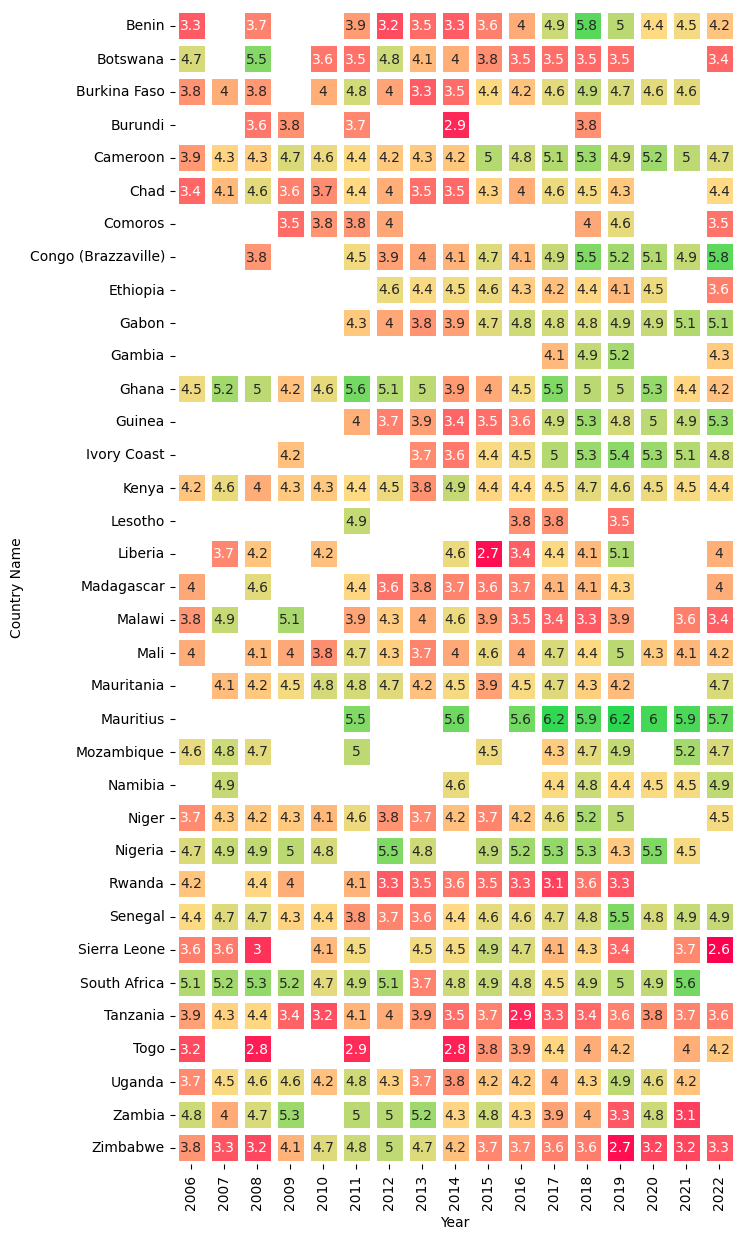

In [16]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'África Subsaariana', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Oriente médio e Norte da África

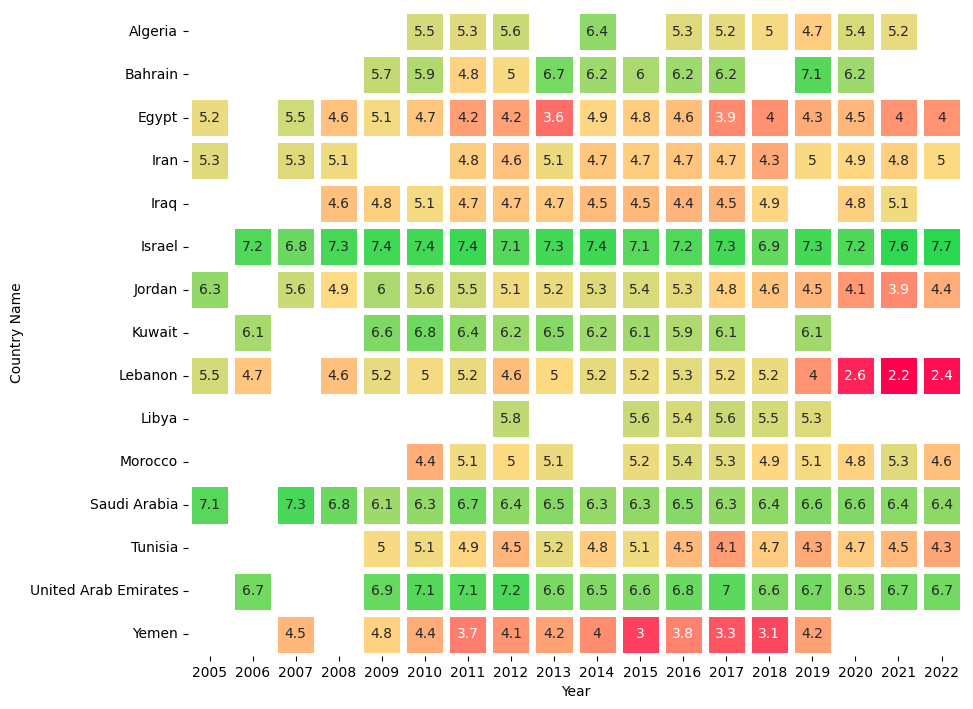

In [17]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Oriente Médio e Norte da África', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Europa Central e Oriental

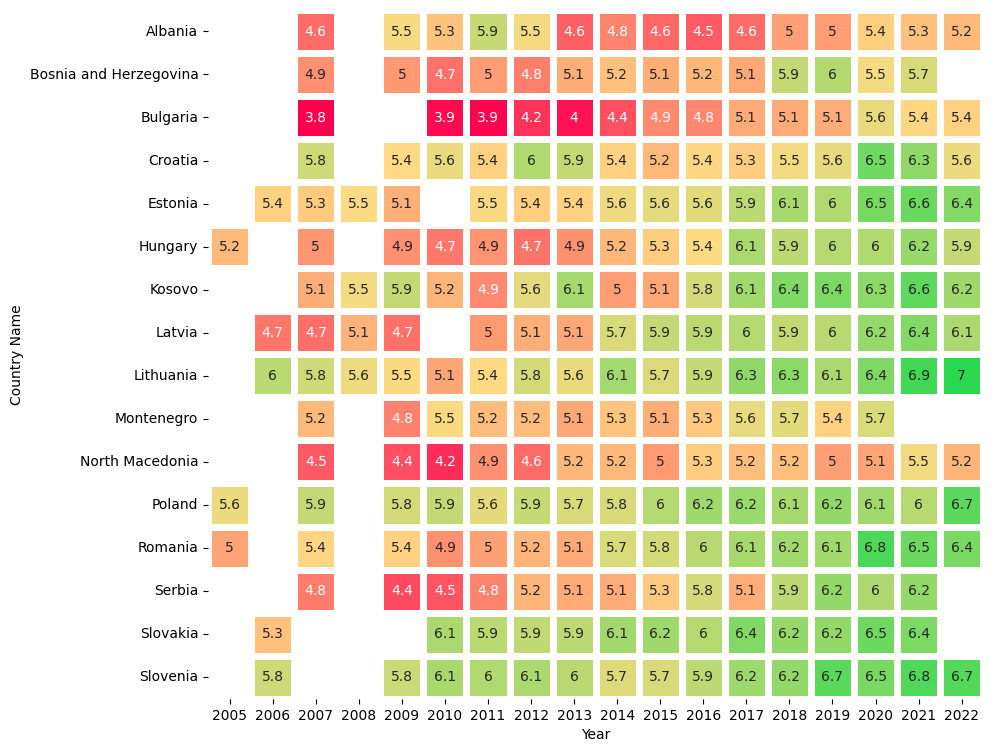

In [18]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Europa Central e Oriental', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Europa Ocidental

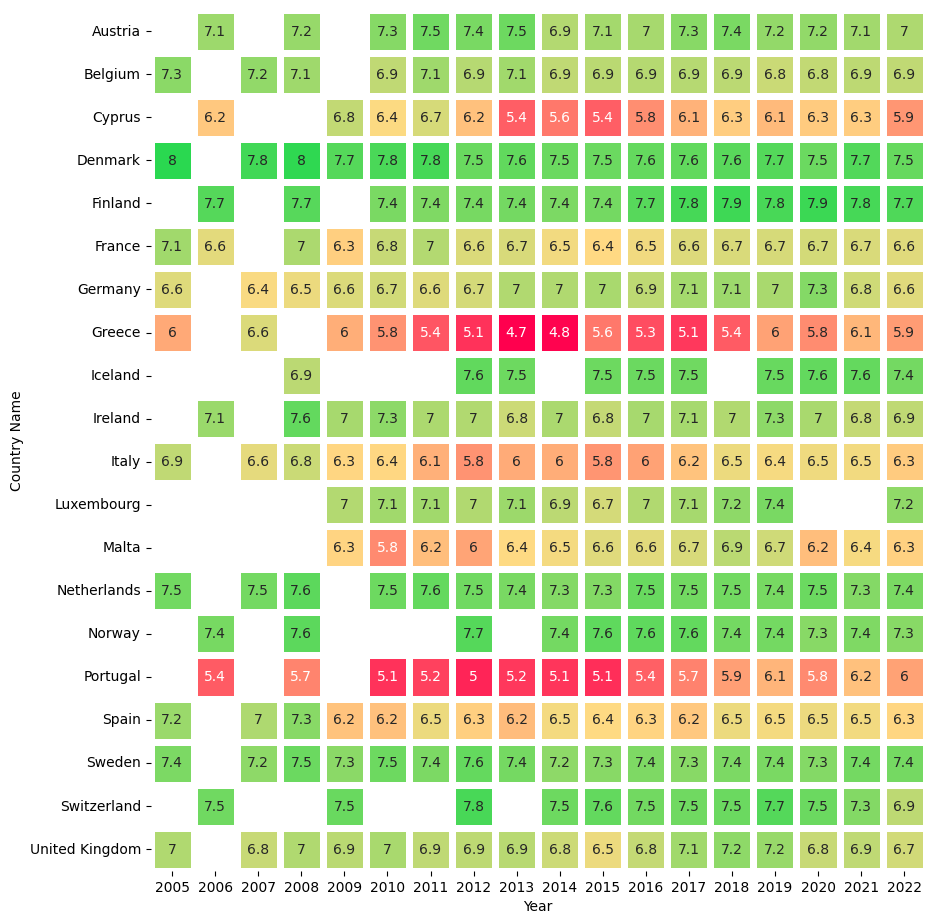

In [19]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Europa Ocidental', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Ásia Meridional

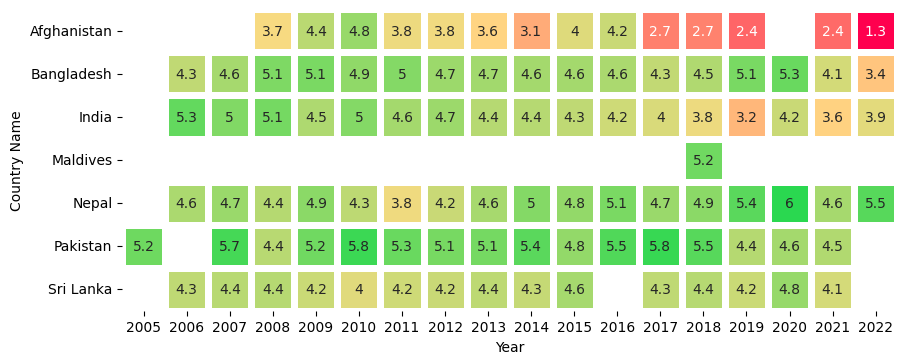

In [20]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Ásia do Sul', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Sudeste Asiático

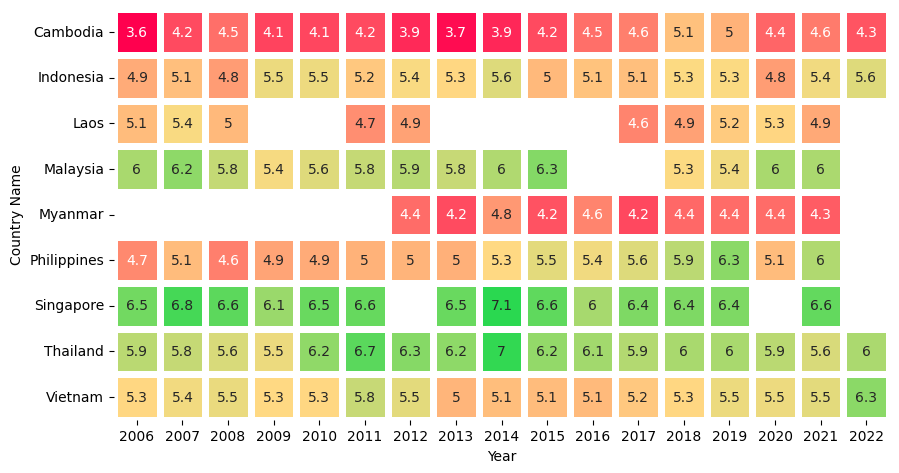

In [21]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Sudeste Asiático', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Ásia Oriental

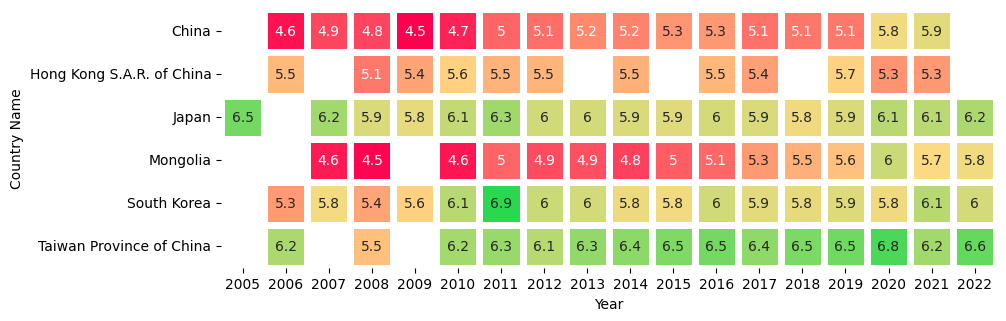

In [22]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Ásia Oriental', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### América Latina e Caribe

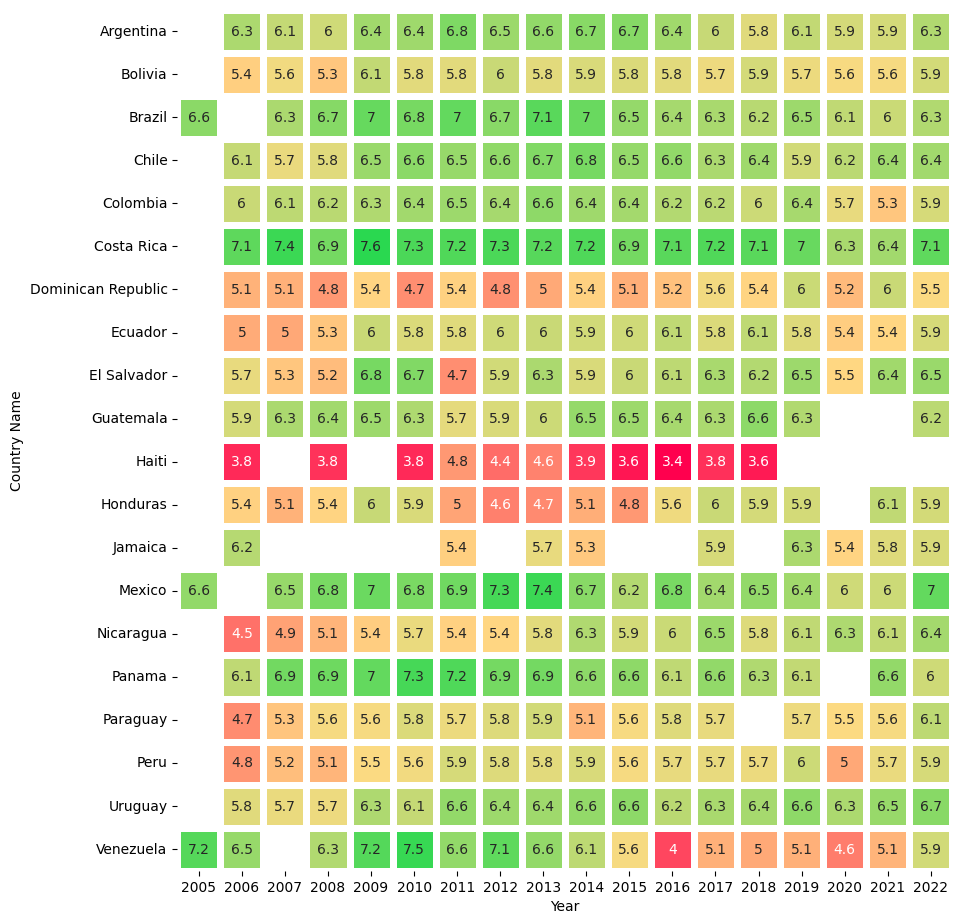

In [23]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'América Latina e Caribe', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### Comunidade dos Estados Independentes

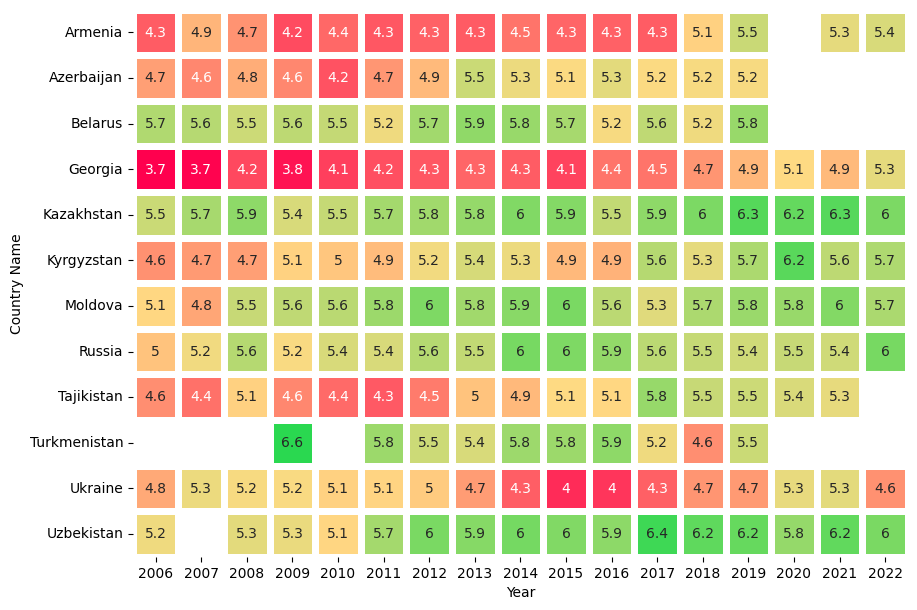

In [24]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'Comunidade dos Estados Independentes', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

### América do Norte e ANZ

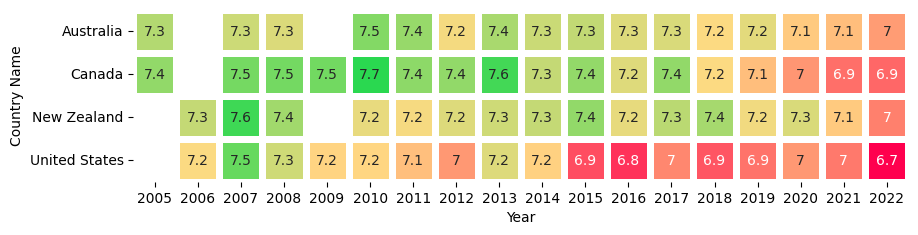

In [25]:
#Criando tabela
temp_df = db.loc[db['Regional Indicator'] == 'América do Norte e ANZ', ['Country Name', 'Year', 'Life Ladder']]
temp_df = temp_df.pivot(index='Country Name', columns='Year', values='Life Ladder')

#Criando esquema de cores
colors = ['#FF004E', '#FFDA83', '#2AD850']
cmap = mpl.colors.LinearSegmentedColormap.from_list("", colors)

#Plotando o heatmap
fig, ax = plt.subplots(1, 1, figsize=(10,15))
sns.heatmap(temp_df, cmap=cmap, ax=ax, square=True, annot=True, linewidth=5, cbar=False)

plt.show()

## Correlação de Pearson

A correlação de Pearson é uma medida estatística que ajuda a entender a relação entre duas variáveis e prever os valores de uma variável com base nos valores da outra variável.

O coeficiente de correlação r varia de -1 a 1 e representa a força e a direção da relação entre as duas variáveis. Quando r é igual ou próximo a 1, há uma correlação positiva entre as duas variáveis, ou seja, quando uma variável aumenta, a outra também aumenta em proporção constante. Por outro lado, quando o valor de r é igual ou próximo a -1, há uma correlação negativa entre as variáveis, o que significa que quando uma variável aumenta, a outra diminui em proporção constante. Quando o valor de r é igual a 0, isso indica que não há correlação linear entre as duas variáveis.

<ipython-input-26-53a6f9ae0c1f>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



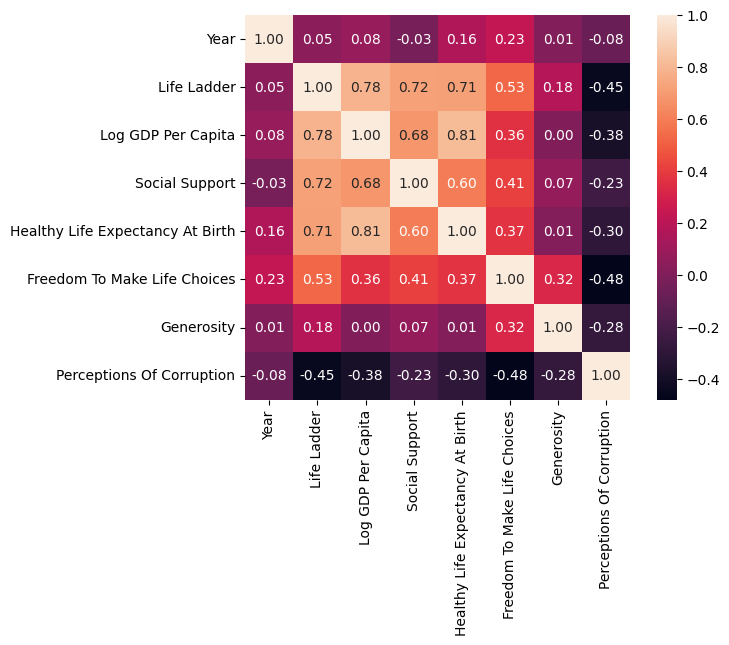

In [26]:
#Definindo o tamanho do gráfico
plt.figure(figsize=(7,5))

#Plotando o gráfico
sns.heatmap(db.corr(), annot = True, fmt ='.2f', square = True);

O gráfico nos mostra que:

- PIB, apoio social e expectativa de vida possuem uma relação forte com o indicador de felicidade, ou seja, conforme essas variáveis aumentam, a felicidade tende a aumentar;
-PIB tem uma relação forte com a expectativa de vida e apoio social;
-Noção de corrupção possui uma relação negativa ainda considerada fraca com o indicador de felicidade, ou seja, a noção de corrupção parece afetar um pouco negativamente a felicidade;
-Ao longo dos anos, a liberdade e expectativa de vida cresceram lentamente.

Com isso, percebemos que a maioria das relações foram como esparado, mostrando que pautas como PIB, apoio social, corrupção e expectativa de vida realmente interferem na vida da população. <br>
No entanto, é importante lembrar que a correlação de Pearson só mede a relação linear entre as duas variáveis e não leva em conta outras possíveis relações não lineares ou causais entre elas. Ou seja, mesmo a generosidade não tendo uma aparente relação forte com outras variáveis, acredito que ela pode sim estar relacionada indiretamente com a felicidade, por exemplo.

## Dispersões

O gráfico de dispersão também é utilizado para verificar a correlação entre as variáveis, vamos plotar alguns para nossas principais variáveis.

### PIB e Felicidade

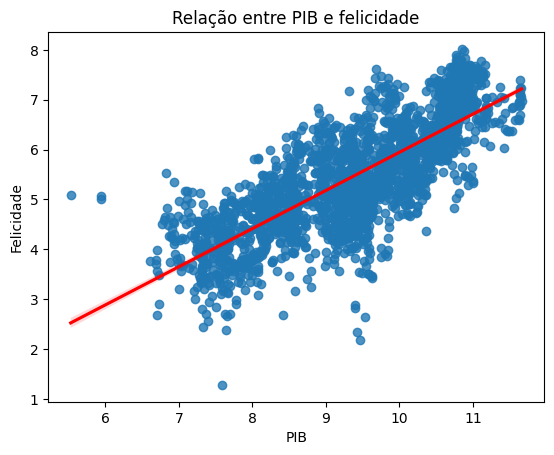

In [27]:
#Definindo variáveis
PIB = db["Log GDP Per Capita"]
felicidade = db["Life Ladder"]

#Plotando o gráfico
sns.regplot(x=PIB, y=felicidade, line_kws={'color': 'red'})

#Configurando títulos
plt.ylabel("Felicidade")
plt.xlabel("PIB")
plt.title("Relação entre PIB e felicidade");

### PIB e Expectativa de Vida

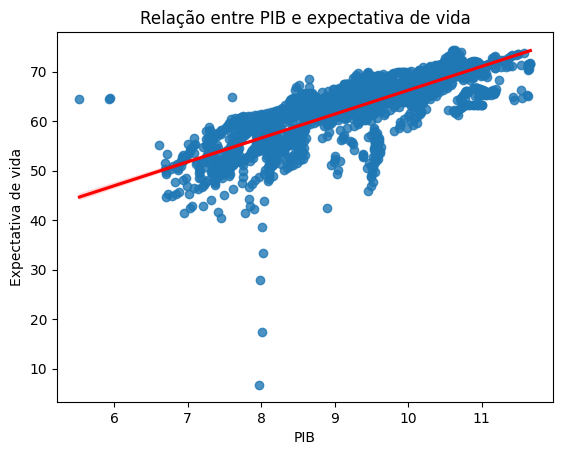

In [28]:
#Plotando o gráfico
sns.regplot(x=PIB, y=db["Healthy Life Expectancy At Birth"], line_kws={"color":"red"})

#Configurando títulos
plt.ylabel("Expectativa de vida")
plt.xlabel("PIB")
plt.title("Relação entre PIB e expectativa de vida");

Ao analisar esse gráfico, percebemos alguns outliers estranhos nos países com PIB de aproximadamente 8.
Vamos gerar uma tabela para encontrar quais são os países com esses valores muito baixos de expectativa de vida.

In [29]:
db[["Year","Country Name","Healthy Life Expectancy At Birth"]].sort_values(by="Healthy Life Expectancy At Birth").head(10)

,Year,Country Name,Healthy Life Expectancy At Birth
766,2006,Haiti,6.720000
767,2008,Haiti,17.360001
768,2010,Haiti,28.000000
769,2011,Haiti,33.320000
770,2012,Haiti,38.639999
2182,2006,Zimbabwe,40.400002
344,2007,Central African Republic,41.480000
1118,2011,Lesotho,41.520000
2183,2007,Zimbabwe,41.599998
1119,2016,Lesotho,42.250000


O Haiti lidera o ranking em 5 anos diferentes como país com a expectativa de vida mais baixa. Me parece estranho esses números tão baixos, mas não consegui encontrar nenhuma explicação na internet sobre essa variável na pesquisa feita pelo instituto.


### Felicidade e Suporte Social

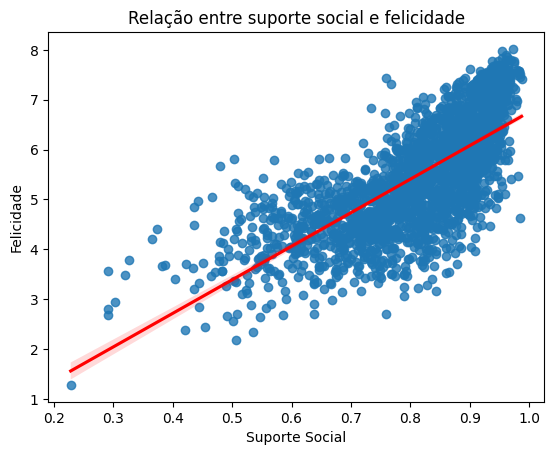

In [30]:
#Definindo variáveis
suporte_social = db["Social Support"]
felicidade = db["Life Ladder"]

#Plotando o gráfico
sns.regplot(x=suporte_social, y=felicidade, line_kws={'color': 'red'})

#Configurando títulos
plt.ylabel("Felicidade")
plt.xlabel("Suporte Social")
plt.title("Relação entre suporte social e felicidade");

### Suporte social e PIB

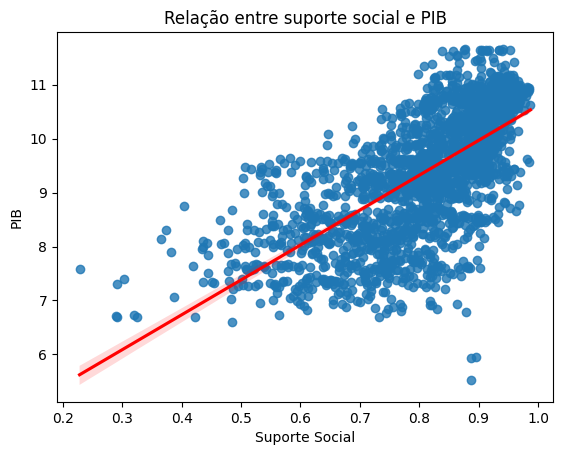

In [31]:
#Definindo variáveis
suporte_social = db["Social Support"]
PIB = db["Log GDP Per Capita"]

#Plotando o gráfico
sns.regplot(x=suporte_social, y=PIB, line_kws={'color': 'red'})

#Configurando títulos
plt.ylabel("PIB")
plt.xlabel("Suporte Social")
plt.title("Relação entre suporte social e PIB");

### Noção de corrupção e felicidade

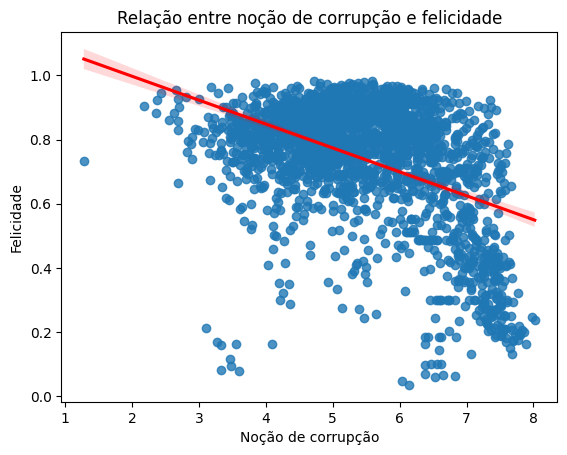

In [32]:
#Definindo variáveis
corrupcao = db["Perceptions Of Corruption"]
felicidade = db["Life Ladder"]

#Plotando o gráfico
sns.regplot(x=felicidade, y=corrupcao, line_kws={'color': 'red'})

#Configurando títulos
plt.ylabel("Felicidade")
plt.xlabel("Noção de corrupção")
plt.title("Relação entre noção de corrupção e felicidade");

# Conclusão

Com base na análise dos dados, podemos chegar a algumas conclusões importantes sobre os fatores que influenciam a felicidade das pessoas em diferentes países ao longo do tempo.

Em primeiro lugar, verificamos que a média geral de felicidade não sofreu grandes alterações ao longo dos anos, o que sugere que há uma estabilidade na percepção da felicidade por parte das pessoas em diferentes regiões do mundo.

No entanto, identificamos que existem grandes disparidades entre as regiões em relação à felicidade. As regiões da América do Norte e Europa Ocidental apresentam os maiores índices de felicidade, enquanto as regiões da África Subsaariana e Sul da Ásia apresentam os menores índices.

Além disso, podemos observar que países que enfrentam crises humanitárias e de segurança tendem a ser menos felizes, como Haiti, Camboja, Afeganistão e Líbano. A instabilidade política, a falta de segurança e a ausência de direitos humanos básicos impactam negativamente a felicidade das pessoas.

Em relação aos fatores que mais influenciam a felicidade, podemos afirmar que o PIB é a variável mais importante, tanto diretamente quanto indiretamente. O PIB está associado a uma série de fatores que contribuem para a felicidade das pessoas, como a ajuda social e a expectativa de vida. O aumento da riqueza e da estabilidade econômica em um país pode melhorar a qualidade de vida das pessoas e aumentar sua felicidade.

Por outro lado, a percepção de corrupção é um fator que afeta negativamente a felicidade das pessoas. Quando a noção de corrupção aumenta, outras variáveis importantes para a felicidade, como o PIB e a liberdade, diminuem.

Enfim, podemos observar como a instabilidade política, a violência e a falta de segurança têm um impacto significativo na felicidade das pessoas. Países que estão em guerra ou enfrentam crises humanitárias têm índices de felicidade muito baixos e muitas vezes vivem em condições precárias. Além disso, essas condições afetam o desenvolvimento econômico e social desses países, reduzindo ainda mais a felicidade das pessoas.

Concluindo, além dessa análise nos mostrar que fatores como o PIB e a percepção de corrupção são importantes para a felicidade das pessoas, também nos alerta para a necessidade de promover a estabilidade política, a segurança e os direitos humanos como forma de aumentar a felicidade em todo o mundo.